# Operations on the Unit Circle

## Task 3

### Analytical results

In [1]:
from random import randrange
import numpy as np

In [2]:
rand_angle = randrange(360)
print('The random angle is', rand_angle)

The random angle is 31


In [3]:
rot_angle = rand_angle/360*2*np.pi

In [4]:
q_state = [np.cos(rot_angle), np.sin(rot_angle)]

In [5]:
copies = 1000

In [6]:
zeros_expected = copies*np.cos(rot_angle)**2
ones_expected = copies*np.sin(rot_angle)**2

In [7]:
print('The expected values of observing |0> is', round(zeros_expected,4))
print('The expected values of observing |1> is', round(ones_expected,4))

The expected values of observing |0> is 734.7358
The expected values of observing |1> is 265.2642


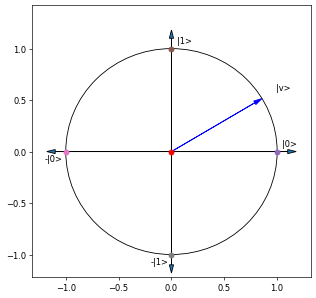

In [8]:
%run qlatvia.py
draw_qubit()
draw_quantum_state(q_state[0], q_state[1], '|v>')

### Experimental results

In [9]:
from qiskit import QuantumRegister, ClassicalRegister, execute, Aer, QuantumCircuit
from qiskit.visualization import plot_histogram

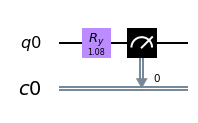

In [10]:
qreg = QuantumRegister(1)
creg = ClassicalRegister(1)
qc = QuantumCircuit(qreg, creg)
qc.ry(2*rot_angle, qreg[0])
qc.measure(qreg, creg)
qc.draw('mpl')

In [11]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
counts = job.result().get_counts(qc)
print(counts)

{'0': 723, '1': 277}


In [12]:
ones_observed = 0
if '1' in counts:
    ones_observed = counts['1']

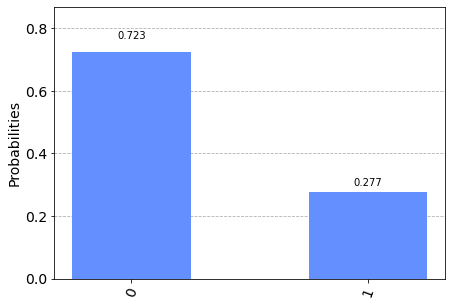

In [13]:
plot_histogram(counts)

In [14]:
dif = abs(ones_expected - ones_observed)
print('The expected number of ones =', ones_expected)
print('The observed number of ones =', ones_observed)
print('The difference is ', dif, 'with percentage of', dif/100, '%')

The expected number of ones = 265.26421860705454
The observed number of ones = 277
The difference is  11.735781392945455 with percentage of 0.11735781392945455 %


# Rotations

## Task 2

In [15]:
%run qlatvia.py
import numpy as np

In [16]:
def rotation_operator(x_element,y_element):
    x = (1/np.sqrt(2))*x_element - (1/np.sqrt(2))*y_element
    y = (1/np.sqrt(2))*x_element + (1/np.sqrt(2))*y_element
    return [x,y]

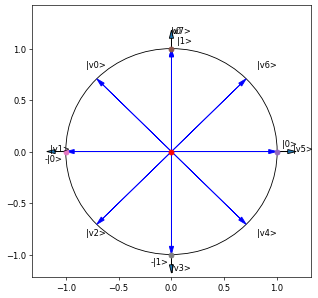

In [17]:
draw_qubit()
[x,y] = [0,1]
draw_quantum_state(x,y,'v0')

for i in range(8):
    [x,y] = rotation_operator(x,y)
    draw_quantum_state(x,y, '|v'+str(i)+'>')

## Task 3

In [18]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
import numpy as np

Iteration 1 : The quantum state is  0.707 |0> + 0.707 |1>
Iteration 2 : The quantum state is  0.0 |0> + 1.0 |1>
Iteration 3 : The quantum state is  -0.707 |0> + 0.707 |1>
Iteration 4 : The quantum state is  -1.0 |0> + 0.0 |1>
Iteration 5 : The quantum state is  -0.707 |0> + -0.707 |1>
Iteration 6 : The quantum state is  0.0 |0> + -1.0 |1>
Iteration 7 : The quantum state is  0.707 |0> + -0.707 |1>
Iteration 8 : The quantum state is  1.0 |0> + 0.0 |1>


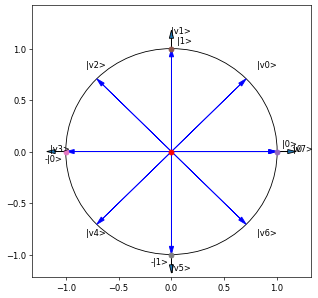

In [19]:
draw_qubit()
[x,y] = [1,0]
draw_quantum_state(x,y, 'v0')

qreg = QuantumRegister(1)
creg = ClassicalRegister(1)
qc = QuantumCircuit(qreg, creg)

rot_angle = np.pi/4

for i in range(8):
    qc.ry(2*rot_angle,qreg[0])
    
    backend = Aer.get_backend('statevector_simulator')
    job = execute(qc, backend, optimization_level=0)
    q_state = job.result().get_statevector(qc)
    
    x_value = q_state[0].real
    y_value = q_state[1].real
    
    print('Iteration', i+1, ': The quantum state is ', round(x_value,3), '|0> +', round(y_value, 3), '|1>')
    
    draw_quantum_state(x_value, y_value, '|v'+str(i)+'>')

## Task 4

### angle = $\frac{\pi}{6}$

Iteration 1 : The quantum state is  0.866 |0> + 0.5 |1>
Iteration 2 : The quantum state is  0.5 |0> + 0.866 |1>
Iteration 3 : The quantum state is  0.0 |0> + 1.0 |1>
Iteration 4 : The quantum state is  -0.5 |0> + 0.866 |1>
Iteration 5 : The quantum state is  -0.866 |0> + 0.5 |1>
Iteration 6 : The quantum state is  -1.0 |0> + 0.0 |1>
Iteration 7 : The quantum state is  -0.866 |0> + -0.5 |1>
Iteration 8 : The quantum state is  -0.5 |0> + -0.866 |1>
Iteration 9 : The quantum state is  -0.0 |0> + -1.0 |1>
Iteration 10 : The quantum state is  0.5 |0> + -0.866 |1>
Iteration 11 : The quantum state is  0.866 |0> + -0.5 |1>
Iteration 12 : The quantum state is  1.0 |0> + -0.0 |1>


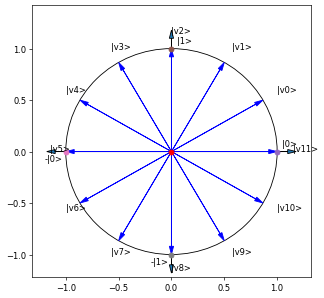

In [20]:
draw_qubit()

qc = QuantumCircuit(qreg, creg)
rot_angle = np.pi/6

for i in range(12):
    qc.ry(2*rot_angle, qreg[0])
    
    backend = Aer.get_backend('statevector_simulator')
    job = execute(qc, backend, optimization_level=0)
    state = job.result().get_statevector(qc)
    
    x_val = state[0].real
    y_val = state[1].real
    
    print('Iteration', i+1, ': The quantum state is ', round(x_val,3), '|0> +', round(y_val, 3), '|1>')
    
    draw_quantum_state(x_val, y_val, '|v'+str(i)+'>')

### angle = $\frac{3\pi}{8}$

Iteration 1 : The quantum state is  0.383 |0> + 0.924 |1>
Iteration 2 : The quantum state is  -0.707 |0> + 0.707 |1>
Iteration 3 : The quantum state is  -0.924 |0> + -0.383 |1>
Iteration 4 : The quantum state is  -0.0 |0> + -1.0 |1>
Iteration 5 : The quantum state is  0.924 |0> + -0.383 |1>
Iteration 6 : The quantum state is  0.707 |0> + 0.707 |1>
Iteration 7 : The quantum state is  -0.383 |0> + 0.924 |1>
Iteration 8 : The quantum state is  -1.0 |0> + 0.0 |1>
Iteration 9 : The quantum state is  -0.383 |0> + -0.924 |1>
Iteration 10 : The quantum state is  0.707 |0> + -0.707 |1>
Iteration 11 : The quantum state is  0.924 |0> + 0.383 |1>
Iteration 12 : The quantum state is  0.0 |0> + 1.0 |1>
Iteration 13 : The quantum state is  -0.924 |0> + 0.383 |1>
Iteration 14 : The quantum state is  -0.707 |0> + -0.707 |1>
Iteration 15 : The quantum state is  0.383 |0> + -0.924 |1>
Iteration 16 : The quantum state is  1.0 |0> + -0.0 |1>


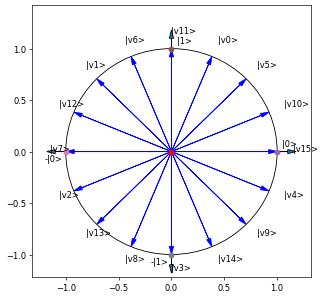

In [21]:
draw_qubit()

qc = QuantumCircuit(qreg, creg)
rot_angle = 3*np.pi/8

for i in range(16):
    qc.ry(2*rot_angle, qreg[0])
    
    backend = Aer.get_backend('statevector_simulator')
    job = execute(qc, backend, optimization_level=0)
    state = job.result().get_statevector(qc)
    
    x_val = state[0].real
    y_val = state[1].real
    
    print('Iteration', i+1, ': The quantum state is ', round(x_val,3), '|0> +', round(y_val, 3), '|1>')
    
    draw_quantum_state(x_val, y_val, '|v'+str(i)+'>')

### angle = $\sqrt{2}\pi$

Iteration 1 : The quantum state is  -0.266 |0> + -0.964 |1>
Iteration 2 : The quantum state is  -0.858 |0> + 0.513 |1>
Iteration 3 : The quantum state is  0.723 |0> + 0.691 |1>
Iteration 4 : The quantum state is  0.473 |0> + -0.881 |1>
Iteration 5 : The quantum state is  -0.975 |0> + -0.221 |1>
Iteration 6 : The quantum state is  0.046 |0> + 0.999 |1>
Iteration 7 : The quantum state is  0.951 |0> + -0.311 |1>
Iteration 8 : The quantum state is  -0.552 |0> + -0.834 |1>
Iteration 9 : The quantum state is  -0.656 |0> + 0.754 |1>
Iteration 10 : The quantum state is  0.902 |0> + 0.432 |1>
Iteration 11 : The quantum state is  0.176 |0> + -0.984 |1>
Iteration 12 : The quantum state is  -0.996 |0> + 0.092 |1>
Iteration 13 : The quantum state is  0.354 |0> + 0.935 |1>
Iteration 14 : The quantum state is  0.807 |0> + -0.59 |1>
Iteration 15 : The quantum state is  -0.784 |0> + -0.621 |1>
Iteration 16 : The quantum state is  -0.39 |0> + 0.921 |1>
Iteration 17 : The quantum state is  0.991 |0> + 0.

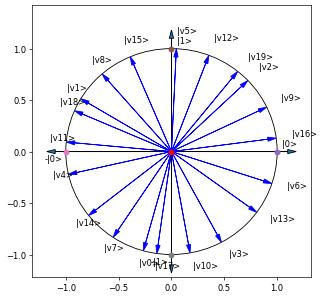

In [22]:
draw_qubit()

qc = QuantumCircuit(qreg, creg)
rot_angle = np.sqrt(2)*np.pi

for i in range(20):
    qc.ry(2*rot_angle, qreg[0])
    
    backend = Aer.get_backend('statevector_simulator')
    job = execute(qc, backend, optimization_level=0)
    state = job.result().get_statevector(qc)
    
    x_val = state[0].real
    y_val = state[1].real
    
    print('Iteration', i+1, ': The quantum state is ', round(x_val,3), '|0> +', round(y_val, 3), '|1>')
    
    draw_quantum_state(x_val, y_val, '|v'+str(i)+'>')

### Task 5 (discussion)

The state $|0\rangle$ will only be visited for integer values of $\alpha$.

### Task 6

In [23]:
for i in range(10):
    rand_angle = randrange(3600)/10
    rot_angle1 = rand_angle/360*2*np.pi
    rot_angle2 = rot_angle1 + np.pi/2
    
    qc1 = QuantumCircuit(qreg, creg)
    qc1.ry(2*rot_angle1, qreg[0])
    
    job = execute(qc1, backend, optimization_level=0)
    state1 = job.result().get_statevector(qc1)
    x1 = state1[0].real
    y1 = state1[1].real
    
    qc2 = QuantumCircuit(qreg, creg)
    qc2.ry(2*rot_angle2, qreg[0])
    
    job = execute(qc2, backend, optimization_level=0)
    state2 = job.result().get_statevector(qc2)
    x2 = state2[0].real
    y2 = state2[0].real
    
    dot_prod = x1*x2 + y1*y2
    
    print('#', i+1)
    print('The dot product =', round(dot_prod,5))
    print('The random angle =', rand_angle)
    print('x1 =', round(x1,5),'&', 'y1 =', round(y1,5))
    print('x2 =', round(x2,5),'&', 'y2 =', round(y2,5))
    print('------------------------------------------------------------------')

# 1
The dot product = -0.32894
The random angle = 299.5
x1 = 0.49242 & y1 = -0.87036
x2 = 0.87036 & y2 = 0.87036
------------------------------------------------------------------
# 2
The dot product = 0.19216
The random angle = 163.4
x1 = -0.95832 & y1 = 0.28569
x2 = -0.28569 & y2 = -0.28569
------------------------------------------------------------------
# 3
The dot product = -1.04641
The random angle = 87.2
x1 = 0.04885 & y1 = 0.99881
x2 = -0.99881 & y2 = -0.99881
------------------------------------------------------------------
# 4
The dot product = 0.16696
The random angle = 347.2
x1 = 0.97515 & y1 = -0.22155
x2 = 0.22155 & y2 = 0.22155
------------------------------------------------------------------
# 5
The dot product = -1.04484
The random angle = 87.3
x1 = 0.04711 & y1 = 0.99889
x2 = -0.99889 & y2 = -0.99889
------------------------------------------------------------------
# 6
The dot product = -0.19893
The random angle = 125.1
x1 = -0.57501 & y1 = 0.81815
x2 = -0.81815 &

### Task 7

In [24]:
rand_angle = randrange(3600)/10
rot_angle1 = rand_angle/360*2*np.pi
rot_angle2 = rot_angle1 - np.pi/2

qc = QuantumCircuit(qreg, creg)

if randrange(2) == 0:
    qc.ry(2*rot_angle1, qreg[0])
    chosen_angle = 'theta1'
else:
    qc.ry(2*rot_angle2, qreg[0])
    chosen_angle = 'theta2'
    
your_guess = ""

qc.ry(-2*rot_angle1, qreg[0])
qc.measure(qreg, creg)

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=100)
counts = job.result().get_counts()
print(counts)

if '0' in counts:
    your_guess = 'theta1'
else:
    your_guess = 'theta2'
    
print("your guess is",your_guess)
print("picked_angle is",chosen_angle)

{'1': 100}
your guess is theta2
picked_angle is theta2


# Reflections

## Task 1

In [25]:
qubit_num = 5
qreg = QuantumRegister(qubit_num)
creg = ClassicalRegister(qubit_num)

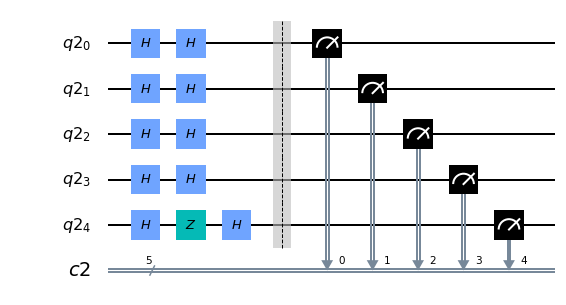

In [26]:
circ = QuantumCircuit(qreg,creg)
for i in range(qubit_num):
    circ.h(qreg[i])
for i in range(qubit_num):
    if randrange(2) == 0:
        circ.z(qreg[i])
for i in range(qubit_num):
    circ.h(qreg[i])
circ.barrier()
circ.measure(qreg,creg)
circ.draw('mpl')

In [27]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circ, backend, shots=1000)
counts = job.result().get_counts(circ)
print(counts)

{'10000': 1000}


### Task 2

In [28]:
def random_polar_quantum_state():
    angle_deg = randrange(360)
    angle_rad = 2*np.pi*angle_deg/360
    state = [np.cos(angle_rad), np.sin(angle_rad)]
    return state

Initial state: -0.9781476007338057 |0> +  -0.9552783621223437 |1>
Reflected state: -0.9781476007338057 |0> +  -0.5446390350150271 |1>


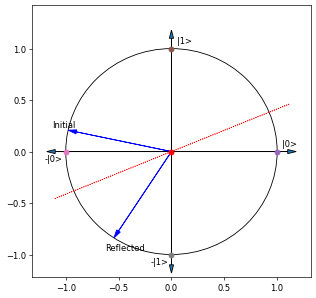

In [29]:
draw_qubit()
from matplotlib.pyplot import arrow
arrow(-1.109,-0.459,2.218,0.918,linestyle='dotted',color='red')

[x1, y1] = random_polar_quantum_state()
print('Initial state:', x1,'|0> + ',x2,'|1>')

norm_const = 1/np.sqrt(2)

[x2,y2] = [ norm_const*x1 + norm_const*y1 , norm_const*x1 - norm_const*y1 ]

print('Reflected state:', x1,'|0> + ',x2,'|1>')

draw_quantum_state(x1, y1, 'Initial')
draw_quantum_state(x2, y2, 'Reflected')

### Task 3

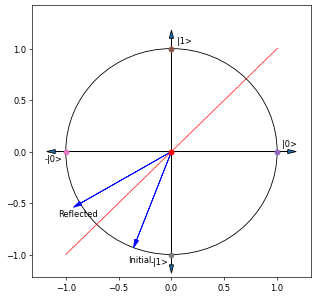

In [30]:
draw_qubit()
arrow(-1,-1,2,2,linestyle='dotted',color='red')

[x1,y1] = random_polar_quantum_state()
[x2,y2] = [y1,x2]

draw_quantum_state(x1, y1, 'Initial')
draw_quantum_state(x2, y2, 'Reflected')

# Quantum Tomography

In [31]:
# class unknown_qubit
#   available_qubit = 1000 -> you get at most 1000 qubit copies
#   get_qubits(number_of_qubits) -> you get the specified number of qubits for your experiment
#   measure_qubits() -> your qubits are measured and the result is returned as a dictionary variable
#                    -> after measurement, these qubits are destroyed
#   rotate_qubits(angle) -> your qubits are rotated with the specified angle in radian
#   compare_my_guess(my_angle) -> your guess in radian is compared with the real angle

from random import randrange
from math import pi
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
class unknown_qubit:   
    def __init__(self):
        self.__theta = randrange(18000)/18000*pi        
        self.__available_qubits = 1000
        self.__active_qubits = 0
        print(self.__available_qubits,"qubits are created")
    
    def get_qubits(self,number_of_qubits=None):
        if number_of_qubits is None or isinstance(number_of_qubits,int) is False or number_of_qubits < 1:
            print()
            print("ERROR: the method 'get_qubits' takes the number of qubit(s) as a positive integer, i.e., get_qubits(100)")
        elif number_of_qubits <= self.__available_qubits:
            self.__qc = QuantumCircuit(1,1)
            self.__qc.ry(2 * self.__theta,0)
            self.__active_qubits = number_of_qubits
            self.__available_qubits = self.__available_qubits - self.__active_qubits
            print()
            print("You have",number_of_qubits,"active qubits that are set to (cos(theta),sin(theta))")
            self.available_qubits()
        else:
            print()
            print("WARNING: you requested",number_of_qubits,"qubits, but there is not enough available qubits!")
            self.available_qubits()
            
    def measure_qubits(self):    
        if self.__active_qubits > 0:            
            self.__qc.measure(0,0)
            job = execute(self.__qc,Aer.get_backend('qasm_simulator'),shots=self.__active_qubits)
            counts = job.result().get_counts(self.__qc)
            print()
            print("your",self.__active_qubits,"qubits are measured")
            print("counts = ",counts)
            self.__active_qubits = 0
            return counts
        else:
            print()
            print("WARNING: there is no active qubits -- you might first execute 'get_qubits()' method")
            self.available_qubits()
            
    def rotate_qubits(self,angle=None):
        if angle is None or (isinstance(angle,float) is False and isinstance(angle,int) is False):
            print()
            print("ERROR: the method 'rotate_qubits' takes a real-valued angle in radian as its parameter, i.e., rotate_qubits(1.2121)")
        elif self.__active_qubits > 0:
            self.__qc.ry(2 * angle,0)
            print()
            print("your active qubits are rotated by angle",angle,"in radian")
        else:
            print()
            print("WARNING: there is no active qubits -- you might first execute 'get_qubits()' method")
            self.available_qubits()    
    
    def compare_my_guess(self,my_angle):
        if my_angle is None or (isinstance(my_angle,float) is False and isinstance(my_angle,int) is False):
            print("ERROR: the method 'compare_my_guess' takes a real-valued angle in radian as your guessed angle, i.e., compare_my_guess(1.2121)")
        else:
            self.__available_qubits = 0
            diff = abs(my_angle-self.__theta)
            print()
            print(self.__theta,"is the original",)
            print(my_angle,"is your guess")
            print("the angle difference between the original theta and your guess is",diff/pi*180,"degree")
            print("-->the number of available qubits is (set to) zero, and so you cannot make any further experiment")

    def available_qubits(self):
        print("--> the number of available unused qubit(s) is",self.__available_qubits)              

## Task 1

In [32]:
my_experiment = unknown_qubit() 

1000 qubits are created


In [33]:
my_experiment.get_qubits(900)
counts = my_experiment.measure_qubits()


You have 900 active qubits that are set to (cos(theta),sin(theta))
--> the number of available unused qubit(s) is 100

your 900 qubits are measured
counts =  {'0': 352, '1': 548}


In [34]:
zeros_obs = 0
if '0' in counts:
    zeros_obs = counts['0']
    
probability = zeros_obs/900
cos_theta = np.sqrt(probability)
theta = np.arccos(cos_theta)

angle_guess1 = theta
angle_guess1_deg = angle_guess1*180/np.pi
angle_guess2 = np.pi - theta
angle_guess2_deg = angle_guess2*180/np.pi

print('The first guess for the angle is', round(angle_guess1,3), 'rad or', round(angle_guess1_deg,3),'degree')
print('The second guess for the angle is', round(angle_guess2,3), 'rad or', round(angle_guess2_deg,3),'degree')

The first guess for the angle is 0.895 rad or 51.289 degree
The second guess for the angle is 2.246 rad or 128.711 degree


In [35]:
my_experiment.get_qubits(100)
my_experiment.rotate_qubits(-angle_guess1)


You have 100 active qubits that are set to (cos(theta),sin(theta))
--> the number of available unused qubit(s) is 0

your active qubits are rotated by angle -0.8951666729213564 in radian


In [36]:
counts = my_experiment.measure_qubits()
zeros_obs = 0


your 100 qubits are measured
counts =  {'0': 100}


In [37]:
if '0' in counts:
    zeros_obs = counts['0']

In [38]:
if zeros_obs == 100:
    guess = angle_guess1
else:
    guess = angle_guess2

In [39]:
my_experiment.compare_my_guess(guess)


0.8936085770210968 is the original
0.8951666729213564 is your guess
the angle difference between the original theta and your guess is 0.08927231916151623 degree
-->the number of available qubits is (set to) zero, and so you cannot make any further experiment


In [40]:
for i in range(10):
    print('Experiment', i+1)
    print('############')
    
    my_experiment = unknown_qubit()
    my_experiment.get_qubits(900)
    counts = my_experiment.measure_qubits()
    
    zeros_obs = 0
    if '0' in counts:
        zeros_obs = counts['0']
        
    probability = zeros_obs/900
    cos_theta = np.sqrt(probability)
    theta = np.arccos(cos_theta)
    
    angle_guess1 = theta
    angle_guess1_deg = angle_guess1*180/np.pi
    angle_guess2 = np.pi - theta
    angle_guess2_deg = angle_guess2*180/np.pi
    
    my_experiment.get_qubits(100)
    my_experiment.rotate_qubits(-angle_guess1)
    
    counts = my_experiment.measure_qubits()
    zeros_obs = 0
    
    if '0' in counts:
        zeros_obs = counts['0']
    
    if zeros_obs == 100:
        guess = angle_guess1
    else:
        guess = angle_guess2
        
    my_experiment.compare_my_guess(guess)
    print('-----------------------------------------------------------------------')

Experiment 1
############
1000 qubits are created

You have 900 active qubits that are set to (cos(theta),sin(theta))
--> the number of available unused qubit(s) is 100

your 900 qubits are measured
counts =  {'0': 15, '1': 885}

You have 100 active qubits that are set to (cos(theta),sin(theta))
--> the number of available unused qubit(s) is 0

your active qubits are rotated by angle -1.441335555791786 in radian

your 100 qubits are measured
counts =  {'0': 98, '1': 2}

1.7212437083168077 is the original
1.7002570977980072 is your guess
the angle difference between the original theta and your guess is 1.202444209012132 degree
-->the number of available qubits is (set to) zero, and so you cannot make any further experiment
-----------------------------------------------------------------------
Experiment 2
############
1000 qubits are created

You have 900 active qubits that are set to (cos(theta),sin(theta))
--> the number of available unused qubit(s) is 100

your 900 qubits are measur